<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner



<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `starinfo.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [3]:
# use this file 
PUB_FILENAME = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [40 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing an .html file is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS), which makes parsing HTML a lot easier.

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [25 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index for the rows.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  The `find_all` method of BeautifulSoup might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [4]:
# import the necessary libraries 
from bs4 import BeautifulSoup

 **1.1 [5 pts]  Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.**
    

In [5]:
def make_soup(filename: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    # your code here
    soup = BeautifulSoup(open(filename, encoding='UTF-8'), 'html.parser')
    return soup

In [6]:
# check your code - print the BS object, you should get a familiar HTML page as text
soup = make_soup(PUB_FILENAME)
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2 [25 pts] Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):**
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [7]:
# your code here 
def BS_to_Dict(soup) -> list:
    Dict_of_BS = []
    for paper in soup.find_all('ol'):
        paper_info = {}
        # author
        if paper.br.next_sibling:
            paper_info['author'] = paper.br.next_sibling.strip()[:-1]
        else:
            paper_info['author'] = 'N/A'
        # title
        if paper.a:
            paper_info['title'] = paper.a.text.strip()[1:-1]
        else:
            paper_info['title'] = 'N/A'
        # URL
        if paper.a.get('href'):
            paper_info['URL'] = paper.a.get('href').strip()
        else:
            paper_info['URL'] = 'N/A'
        # journal
        if paper.i:
            paper_info['journal'] = paper.i.text.strip()
        else:
            paper_info['journal'] = 'N/A'
        # volume
        if paper.b != None:
            paper_info['volume'] = paper.b.text.strip()
        else:
            paper_info['volume'] = 'N/A' # for missing value

        Dict_of_BS.append(paper_info)
    return Dict_of_BS
#reference: https://stackoverflow.com/questions/46027604/how-to-fetch-data-inside-br-tag-which-is-inside-li-using-python-scraping

In [8]:
# your code here
BS_to_Dict(soup)

[{'URL': 'Papers/2011/PhysRevB_84_125411_2011.pdf',
  'author': 'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng',
  'journal': 'PHYSICAL REVIEW B',
  'title': 'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons',
  'volume': '84'},
 {'URL': 'Papers/2011/PhysRevB_84_035325_2011.pdf',
  'author': 'JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng',
  'journal': 'PHYSICAL REVIEW B',
  'title': 'Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles',
  'volume': '84'},
 {'URL': 'Papers/2011/PhysRevB_83_054204_2011.pdf',
  'author': 'Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras',
  'journal': 'PHYSICAL REVIEW B',
  'title': 'Influence of CH2 content and network defects on the elastic properties of organosilicate glasses',
  'volume': '83'},
 {'URL': 'Papers/2011/PhysRevB_83_045303_2011.pdf',
  'author': 'Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsian

**1.3 [5 pts] Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.**



In [9]:
# your code here
fl = open('publist.bib', 'a')
for paper_info in BS_to_Dict(soup):
    fl.write('@article { \n')
    fl.write("\t" + 'author = "' + paper_info['author'] + '",\n')
    fl.write("\t" + 'title = "' + paper_info['title'] + '",\n')
    fl.write("\t" + 'URL = "' + paper_info['URL'] + '",\n')
    fl.write("\t" + 'journal = "' + paper_info['journal'] + '",\n')
    fl.write("\t" + 'volume = "' + str(paper_info['volume']) + '",\n')
    fl.write('}\n')
    fl.write('\n')
fl.close()

**1.4 [5 pts] Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.** 

In [10]:
# your code here
import pandas as pd
import numpy as np
df = pd.DataFrame(BS_to_Dict(soup))
df.to_csv('publist.csv', header=True, index = False, encoding = 'UTF-8')

<hr style='height:2px'>

## Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first movie at age 17? 
+ how many performers started as child actors? 
+ who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [60 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [15 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [10 pts]** We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [6 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?

- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 

**2.8 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define **most prolific** as the performer with the most credits.
    
**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [11]:
import requests

**2.1 [5 pts] Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):**

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [12]:
# your code here
my_page_url = 'https://www.imdb.com/list/ls025814950/'
my_page = requests.get(my_page_url)

*your answer here*
1. my_page.text is the staff we scrap shown in string format.
2. my_page.status_code indicates status of our request (success, error, etc.).
3. my_page.content is the staff we scrap shown in bytes format.

**2.2 [5 pts] Create a Beautiful Soup object named `star_soup` using `my_page` as input.**


In [13]:
# your code here
def BS(response: requests.models.Response):
    return BeautifulSoup(response.content, "html.parser")
star_soup = BS(my_page)

In [14]:
# check your code - you should see a familiar HTML code
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3 [15 pts] Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....**

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [16]:
# your code here     
import re
def parse_stars(star_soup) -> list:
    dict_star = []
    for each in star_soup.find_all('div', class_="lister-item mode-detail"):
        dict_each = {}        
        # name
        dict_each['name'] = each.find_all('a')[1].text.strip()  
        # gender, female=1, male=0
        if each.p.text.split('|\n')[0].strip() == 'Actress':
            dict_each['gender'] = 1
        else:
            dict_each['gender'] = 0
        # url
        dict_each['url'] = 'https://www.imdb.com' + each.find('a', attrs={'href': re.compile("^/name")}).get('href')
        # page
        dict_each['page'] = BeautifulSoup(requests.get(dict_each['url']).content, "html.parser")
        dict_star.append(dict_each)
    return dict_star
starlist = parse_stars(star_soup)

This should give you 100

In [17]:
len(starlist)

100

In [18]:
# check your code
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]


{'gender': 1, 'name': 'Gal Gadot', 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if (typeof uex == 'function') {
       uex("ld", "LoadTitle

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

**2.4 [15 pts] Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [20]:
def create_star_table(starlist: list) -> list:
    dict_star_info = []
    for each in starlist:
        dict_each_star_info = {}
        # star's name
        dict_each_star_info['star_name'] = each['name']
        # gender
        dict_each_star_info['gender'] = each['gender']
        # birth year
        if each['page'].time == None:
            dict_each_star_info['year_born'] = 'N/A'
        else:
            dict_each_star_info['year_born'] = int(each['page'].time.find('a', attrs={'href': re.compile("birth_year")}).text.strip())
        # name of the first movie
        dict_each_star_info['first_movie'] = each['page'].find('div', attrs = {'class': 'filmo-category-section'}).find_all('b')[-1].text
        # year of the first movie
        raw_year = each['page'].find('div', attrs = {'class': 'filmo-category-section'}).find_all('span')[-1].text
        # to avoid too long parameter
        dict_each_star_info['year_first_movie'] = int(re.findall('\d+', raw_year)[0])
        # credits
        dict_each_star_info['credits'] = int(each['page'].find_all('div',class_='head')[0].a.next_sibling.strip()[1:-1].split(' ')[0])
        dict_star_info.append(dict_each_star_info)
    return dict_star_info
star_table = create_star_table(starlist)  
        
        
        # your code here
  

In [21]:
# check your code
star_table

[{'credits': 28,
  'first_movie': 'Bubot',
  'gender': 1,
  'star_name': 'Gal Gadot',
  'year_born': 1985,
  'year_first_movie': 2007},
 {'credits': 56,
  'first_movie': 'Tommaso',
  'gender': 0,
  'star_name': 'Tom Hardy',
  'year_born': 1977,
  'year_first_movie': 2001},
 {'credits': 19,
  'first_movie': 'Doctors',
  'gender': 1,
  'star_name': 'Emilia Clarke',
  'year_born': 1986,
  'year_first_movie': 2009},
 {'credits': 57,
  'first_movie': 'All My Children',
  'gender': 1,
  'star_name': 'Alexandra Daddario',
  'year_born': 1986,
  'year_first_movie': 2002},
 {'credits': 34,
  'first_movie': 'Järngänget',
  'gender': 0,
  'star_name': 'Bill Skarsgård',
  'year_born': 1990,
  'year_first_movie': 2000},
 {'credits': 33,
  'first_movie': 'Après lui',
  'gender': 1,
  'star_name': 'Pom Klementieff',
  'year_born': 1986,
  'year_first_movie': 2007},
 {'credits': 31,
  'first_movie': 'Una rosa de Francia',
  'gender': 1,
  'star_name': 'Ana de Armas',
  'year_born': 1988,
  'year_first

Your output should look like this (the order of elements is not important):
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

**2.5 [4 pts] Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.**


In [22]:
# your code here
import json
jsonfile = open('starinfo.json','w')
json.dump(star_table,jsonfile)
jsonfile.close()


To check your JSON saving, re-open the JSON file and reload the code

In [23]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)    
# output should be the same
star_table

[{'credits': 28,
  'first_movie': 'Bubot',
  'gender': 1,
  'star_name': 'Gal Gadot',
  'year_born': 1985,
  'year_first_movie': 2007},
 {'credits': 56,
  'first_movie': 'Tommaso',
  'gender': 0,
  'star_name': 'Tom Hardy',
  'year_born': 1977,
  'year_first_movie': 2001},
 {'credits': 19,
  'first_movie': 'Doctors',
  'gender': 1,
  'star_name': 'Emilia Clarke',
  'year_born': 1986,
  'year_first_movie': 2009},
 {'credits': 57,
  'first_movie': 'All My Children',
  'gender': 1,
  'star_name': 'Alexandra Daddario',
  'year_born': 1986,
  'year_first_movie': 2002},
 {'credits': 34,
  'first_movie': 'Järngänget',
  'gender': 0,
  'star_name': 'Bill Skarsgård',
  'year_born': 1990,
  'year_first_movie': 2000},
 {'credits': 33,
  'first_movie': 'Après lui',
  'gender': 1,
  'star_name': 'Pom Klementieff',
  'year_born': 1986,
  'year_first_movie': 2007},
 {'credits': 31,
  'first_movie': 'Una rosa de Francia',
  'gender': 1,
  'star_name': 'Ana de Armas',
  'year_born': 1988,
  'year_first

**2.6 [10 pts] We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.**

In [25]:
# your code here
staff_data = open('data/staff_starinfo.json').read()
frame = pd.read_json(staff_data, orient='records')
frame.dtypes

credits              int64
first_movie         object
gender               int64
name                object
year_born            int64
year_first_movie     int64
dtype: object

In [26]:
for each in frame.columns:
    print(np.sum([frame[each].isnull()]))

0
0
0
0
0
0


In [27]:
frame['age_at_first_movie'] = frame['year_first_movie'] - frame['year_born']

*your answer here*
1. Stars' name and name of movies are object, credits, gender, birth year and year of the first movie are integers.
2. No missing data, all cleaned.
3. No problems in new column.

**2.7 [6 pts] You are now ready to answer the following intriguing questions:**
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?
- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 


In [28]:
# your code here
print( 'Number of performances made first appearance at 17 years old: ',sum(frame['age_at_first_movie'] == 17))
print( 'Number of performances made first appearance below 12 years old: ',sum(frame['age_at_first_movie'] < 12))

Number of performances made first appearance at 17 years old:  8
Number of performances made first appearance below 12 years old:  19



**2.8 [2 pts] Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define *most prolific* as the performer with the most credits.**

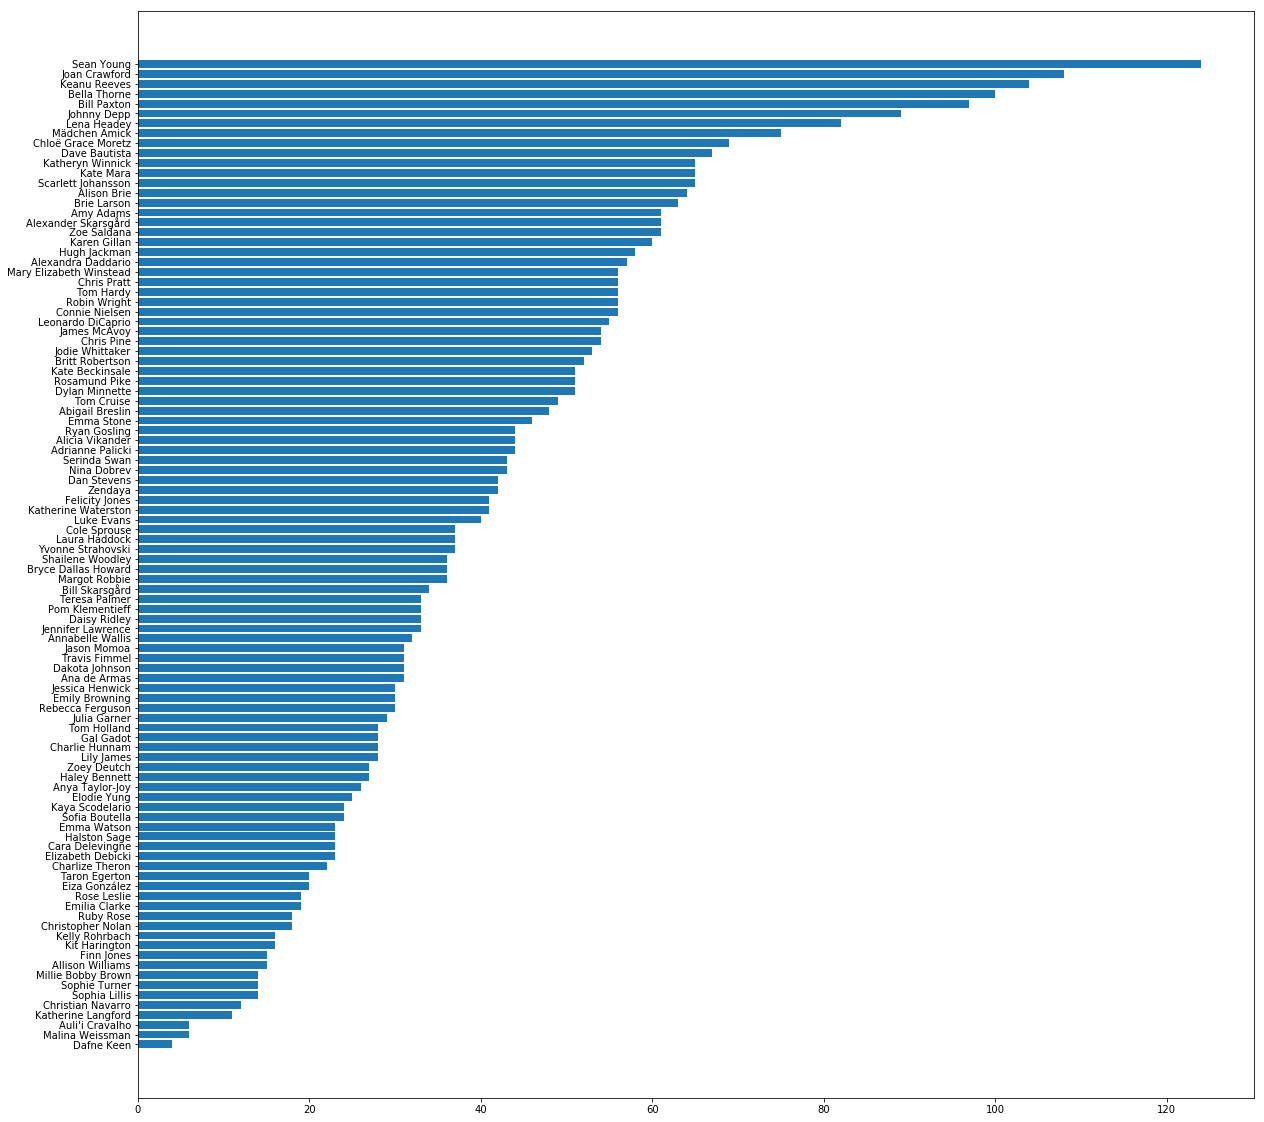

In [52]:
# your code here
fig=plt.figure(figsize=(20,20))
idx = np.argsort(frame.credits)
credits_sorted = frame.credits.iloc[idx]
name_sorted = frame.name.iloc[idx]
y = range(len(frame.name))
plt.barh(x,credits_sorted)
plt.yticks(y, name_sorted)
plt.show()

The most prolific star: Sean Young

**2.9 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

*your answer here*
Most stars have credits no more than 60, with limited stars having high credits up to 80. The pattern is a bit like exponential curve.
